In [20]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../')

from src.emotion.analysis.data_preprocessing import (
    DataPreprocessor,
    LinearInterpolator,
    RollingAverageSmoother,
)

%matplotlib inline

In [11]:
df = pd.read_csv('/home/moritz/Workspace/masterthesis/data/identities/short_clip_debug.csv')

preprocessing_pipeline = [
    LinearInterpolator(),
    RollingAverageSmoother(
        window_size=150,
        cols=[
            "Angry",
            "Disgust",
            "Happy",
            "Sad",
            "Surprise",
            "Fear",
            "Neutral",
        ],
    ),
]

preprocessor = DataPreprocessor(preprocessing_pipeline)
pre_df = preprocessor.preprocess_data(df)

In [18]:
emotions = ["Angry", "Disgust", "Happy", "Sad", "Surprise", "Fear", "Neutral"]

/tmp/ipykernel_656733/569963131.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


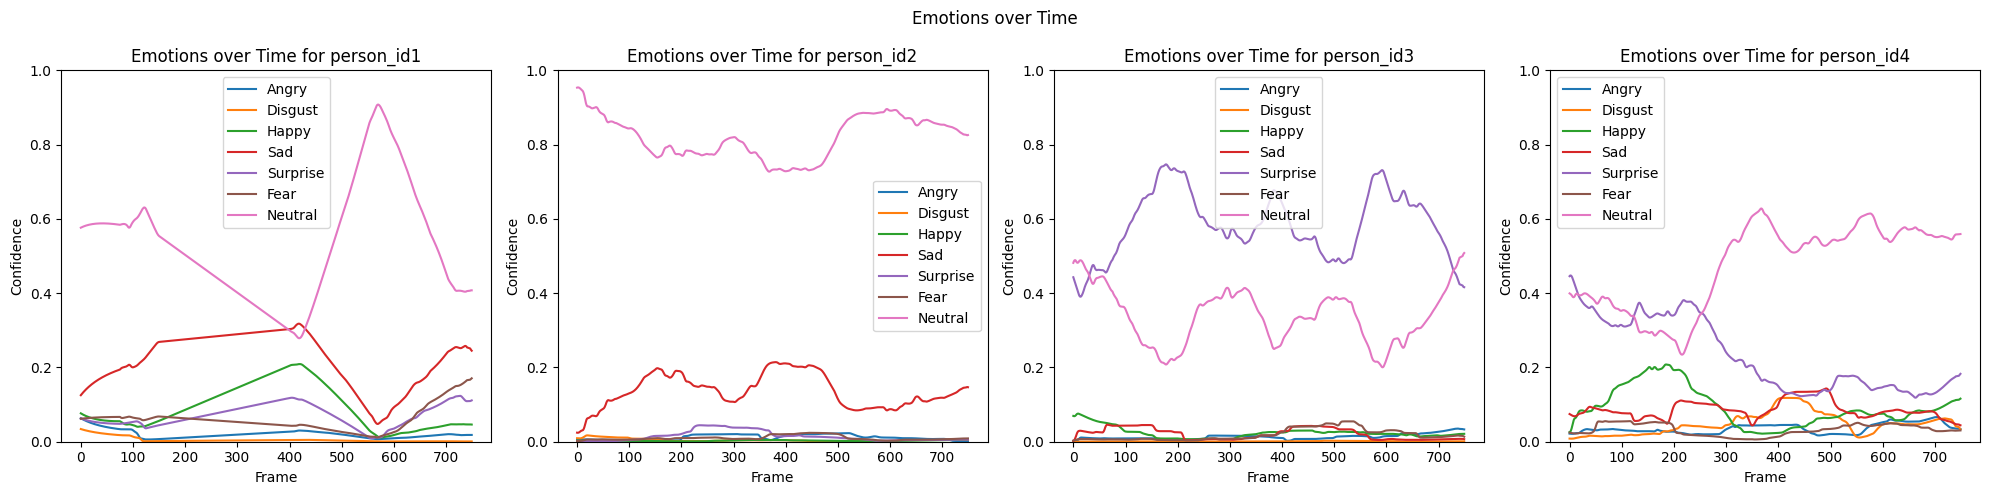

In [15]:
grouped = pre_df.groupby("ClassID")

fig = plt.figure(figsize=(20, 5), tight_layout=True)
fig.suptitle("Emotions over Time")

for i, (person_id, group) in enumerate(grouped):
    emotions_rolling = group[
        [
            "Frame",
            *emotions
        ]
    ]

    ax = fig.add_subplot(1, 4, i + 1)
    emotions_rolling.plot(
        x="Frame",
        y=emotions,
        ax=ax,
    )

    ax.set_title(f"Emotions over Time for {person_id}")
    ax.set_xlabel("Frame")
    ax.set_ylabel("Confidence")
    ax.set_ylim(0, 1)

fig.show()

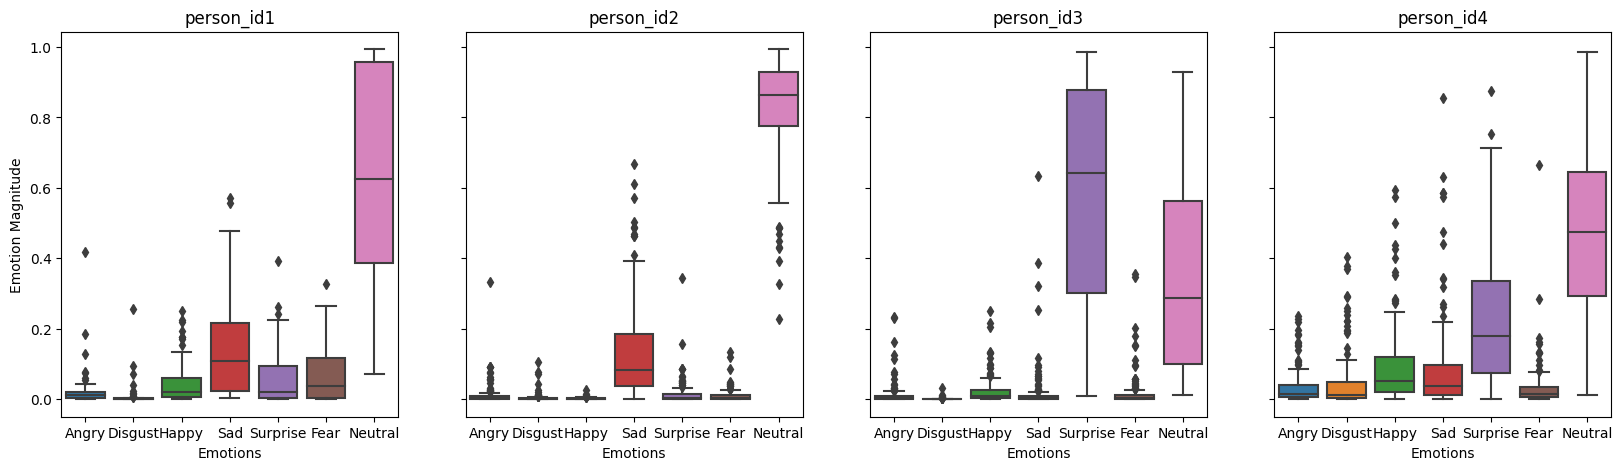

In [36]:
# Set the figure size
fig, axes = plt.subplots(1, len(pre_df['ClassID'].unique()), figsize=(20, 5), sharey=True)

# Loop over each ClassID and plot a boxplot for each emotion
for i, cid in enumerate(pre_df['ClassID'].unique()):
    # Subset the data for the current ClassID
    subset = pre_df[pre_df['ClassID'] == cid][emotions]
    # Plot the boxplot for each emotion on a separate subplot
    sns.boxplot(data=subset, ax=axes[i])
    axes[i].set_title(f'{cid}')
    axes[i].set_xlabel('Emotions')

# Set the y-axis label on the first subplot only
axes[0].set_ylabel('Emotion Magnitude')

# Show the plot
plt.show()

/tmp/ipykernel_656733/3873473675.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


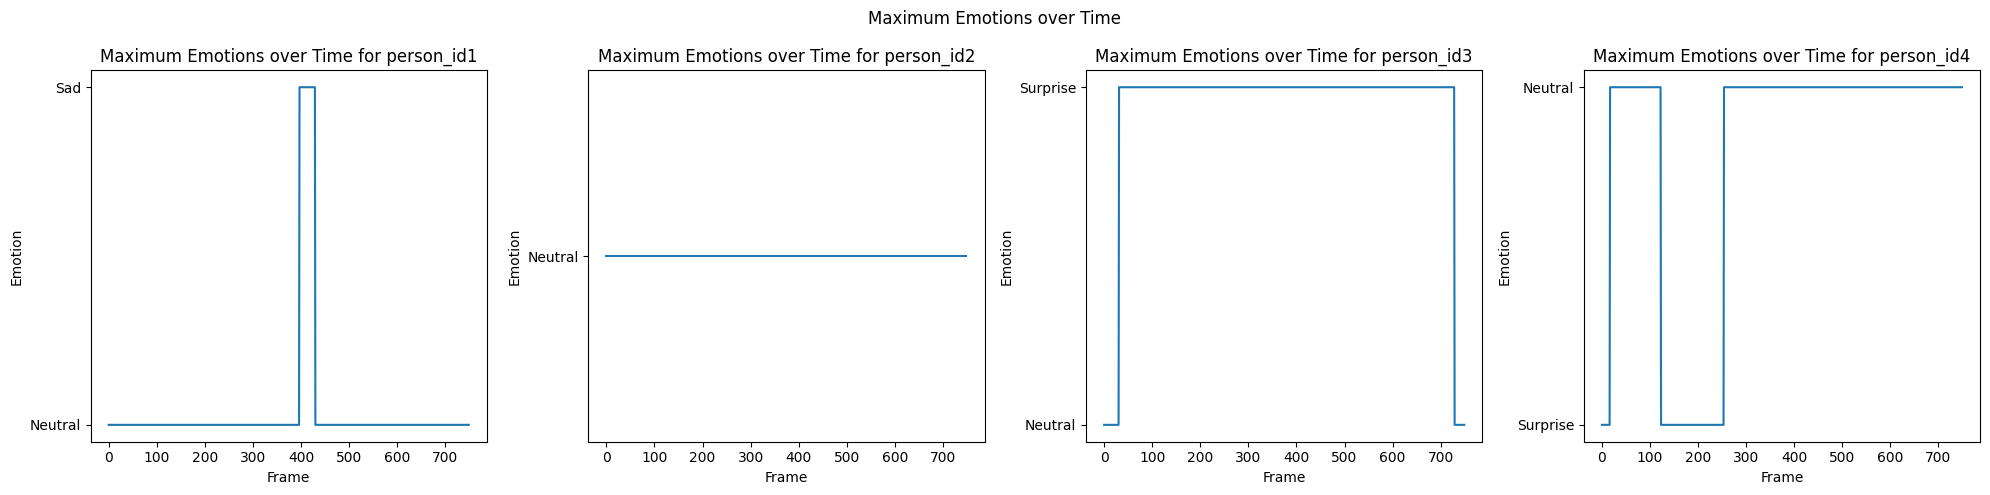

In [29]:
grouped = pre_df.groupby("ClassID")

fig = plt.figure(figsize=(20, 5), tight_layout=True)
fig.suptitle("Maximum Emotions over Time")

for i, (person_id, group) in enumerate(grouped):
    # Get the maximum emotion for each frame
    person_max_emotion = group[emotions].idxmax(axis=1)

    ax = fig.add_subplot(1, 4, i + 1)
    # Plot the maximum emotion over the frame
    ax.plot(group["Frame"], person_max_emotion)
    ax.set_title(f"Maximum Emotions over Time for {person_id}")
    ax.set_xlabel("Frame")
    ax.set_ylabel("Emotion")

fig.show()

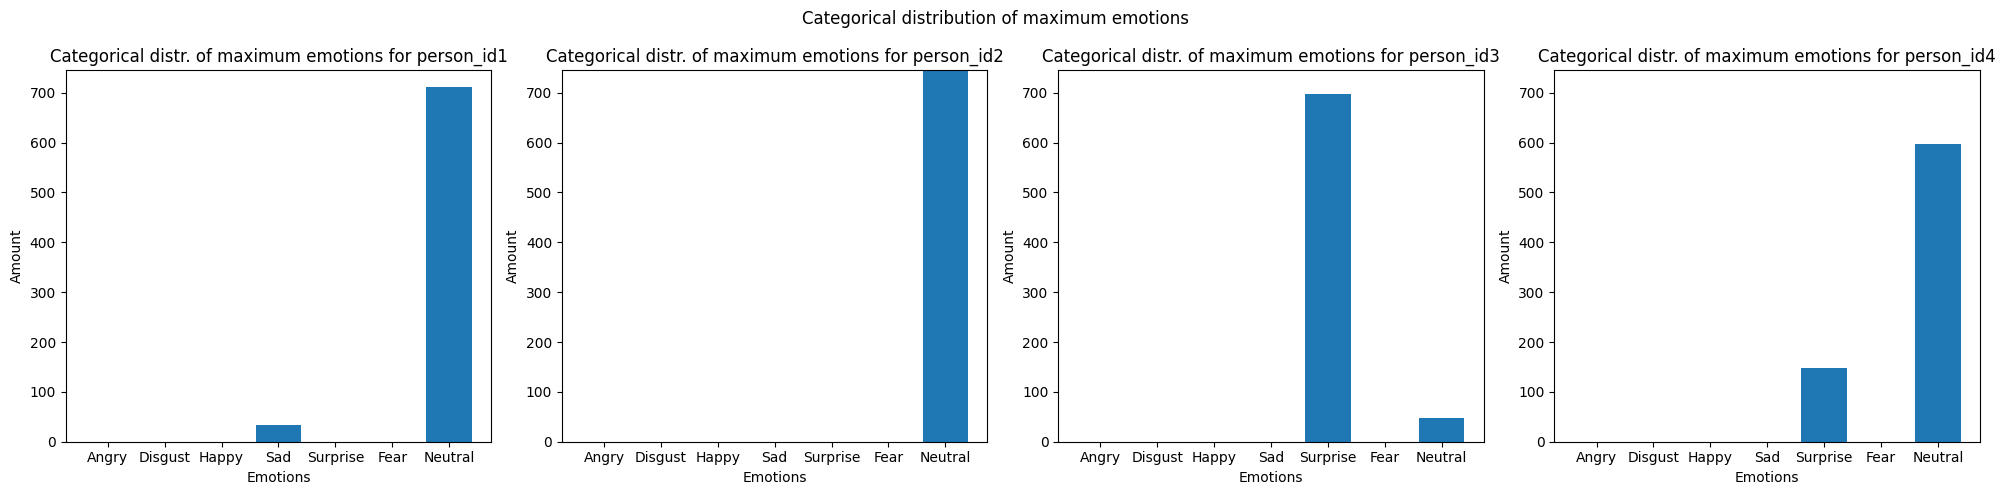

In [31]:
# Find the maximum emotion for each ClassID by selecting the column with the maximum value
pre_df["Max_Emotion"] = pre_df[emotions].idxmax(axis=1)

grouped = pre_df.groupby("ClassID")
max_length_group_index = grouped.size().idxmax()
y_lim = len(grouped.get_group(max_length_group_index))

fig = plt.figure(figsize=(20, 5), tight_layout=True)
fig.suptitle("Categorical distribution of maximum emotions")

for i, (ClassID, group) in enumerate(grouped):

    # Group the data by ClassID and calculate the count of each emotion for each person
    grouped = group.groupby("Max_Emotion").size().reset_index(name="counts")

    ax = fig.add_subplot(1, 4, i + 1)

    # Plot the pivot table as a bar plot
    plt.bar(
        emotions,
        [
            grouped.loc[grouped["Max_Emotion"] == emotion, "counts"].iloc[0]
            if emotion in grouped["Max_Emotion"].values
            else 0
            for emotion in emotions
        ],
    )
    ax.set_title(f"Categorical distr. of maximum emotions for {ClassID}")
    ax.set_xlabel("Emotions")
    ax.set_ylabel("Amount")
    ax.set_ylim(0, y_lim)

plt.show()

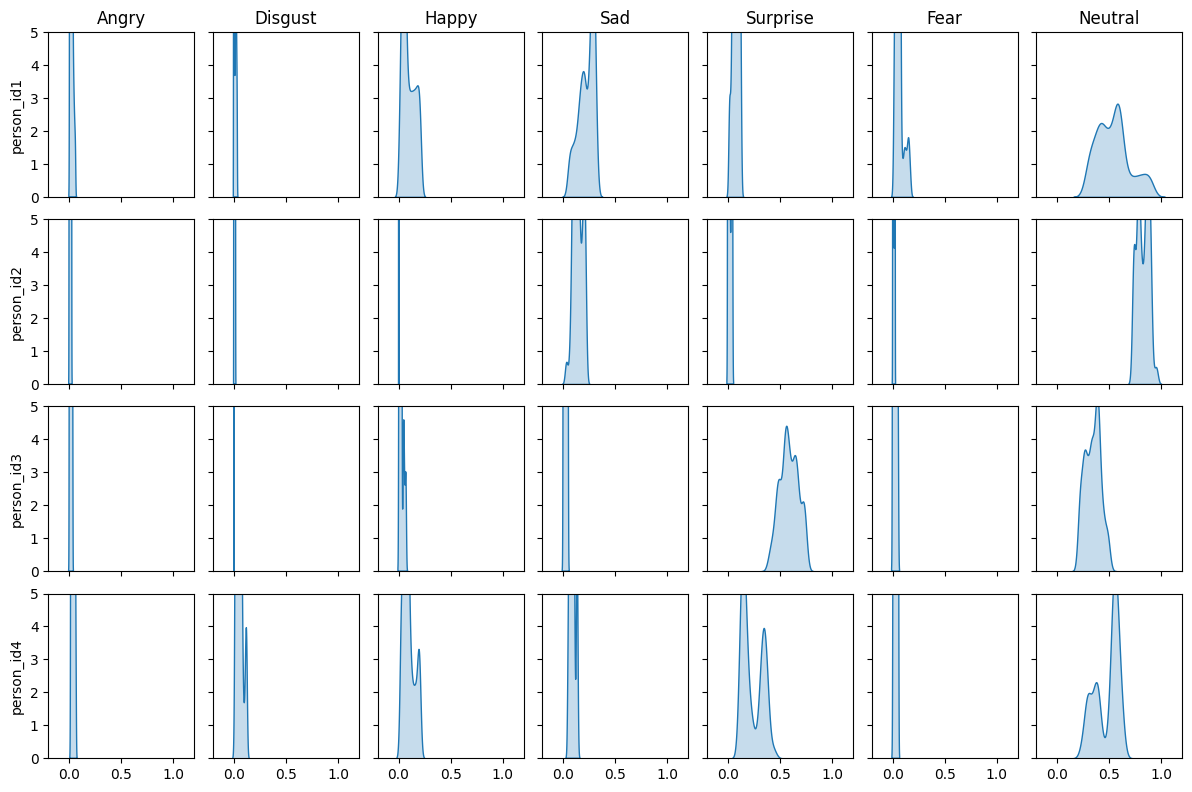

In [33]:
# Group the data by ClassID and emotion columns
grouped = pre_df.groupby(['ClassID', *emotions]).size().reset_index(name='count')

# Define the size of the figure and the number of rows and columns
fig, axes = plt.subplots(nrows=len(grouped['ClassID'].unique()), ncols=len(emotions), figsize=(12, 8), sharex=True, sharey=True)

# Set the x and y axis limits
xlim = (-0.2, 1.2)
ylim = (0, 5)

# Loop over each ClassID and emotion, and plot a distribution plot
for i, cid in enumerate(grouped['ClassID'].unique()):
    for j, e in enumerate(emotions):
        sns.kdeplot(data=grouped[(grouped['ClassID'] == cid)], x=e, ax=axes[i, j], fill=True)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel(f'{cid}')
        if i == 0:
            axes[i, j].set_title(f'{e}')
        axes[i, j].set_xlim(xlim)
        axes[i, j].set_ylim(ylim)

# Adjust the spacing between subplots
fig.tight_layout(pad=1)
plt.show()